<a href="https://colab.research.google.com/github/Deven876/project3-Cardiovascular-Risk-Prediction/blob/main/Project3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

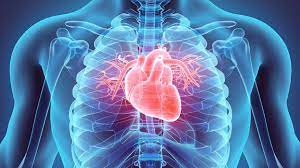
 # **Cardiovascular Risk Prediction**

## <b> Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

## <b> Data Description </b>

### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target) 

**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV**

# Architecture

Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing 

In [67]:
# importing required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

%matplotlib inline


In [2]:
# importing dataset and reading 
file='https://raw.githubusercontent.com/Deven876/project3-Cardiovascular-Risk-Prediction/main/data_cardiovascular_risk.csv'
data=pd.read_csv(file,index_col='id')
data1=data.copy() # making a copy 

# Data Inspection

In [3]:
# First look 
data1.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# looking into shape of dataset
data1.shape
print('number of rows',data1.shape[0])
print('number of columns',data1.shape[1])

number of rows 3390
number of columns 16


In [5]:
#  looking into information(datatype,columns,null/non-null count)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [6]:
# looking in descriptive summary of dataset
data1.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


[Text(0, 0.5, 'mean'),
 Text(0, 1.5, 'std'),
 Text(0, 2.5, 'min'),
 Text(0, 3.5, '25%'),
 Text(0, 4.5, '50%'),
 Text(0, 5.5, '75%'),
 Text(0, 6.5, 'max')]

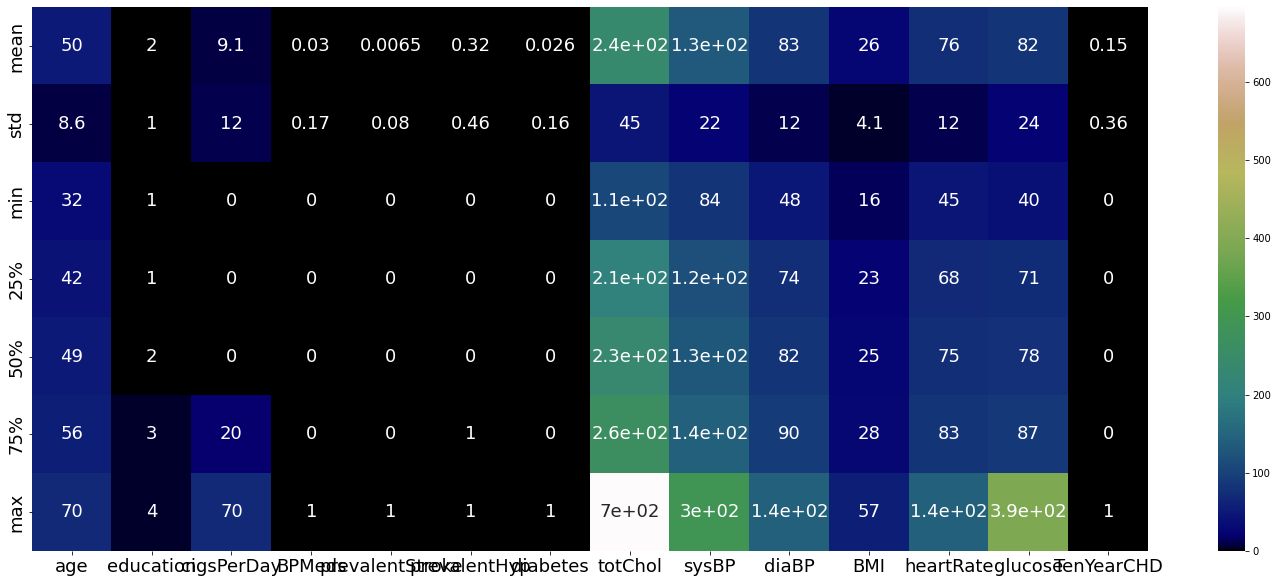

In [7]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(data1.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)


# Handling missing values 

In [8]:
# looking for missing values in dataset 
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))


Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [9]:
data1.dropna(inplace=True) # from above we can see that not so many values are missing so we can just drop them


## **Outlier Detection**

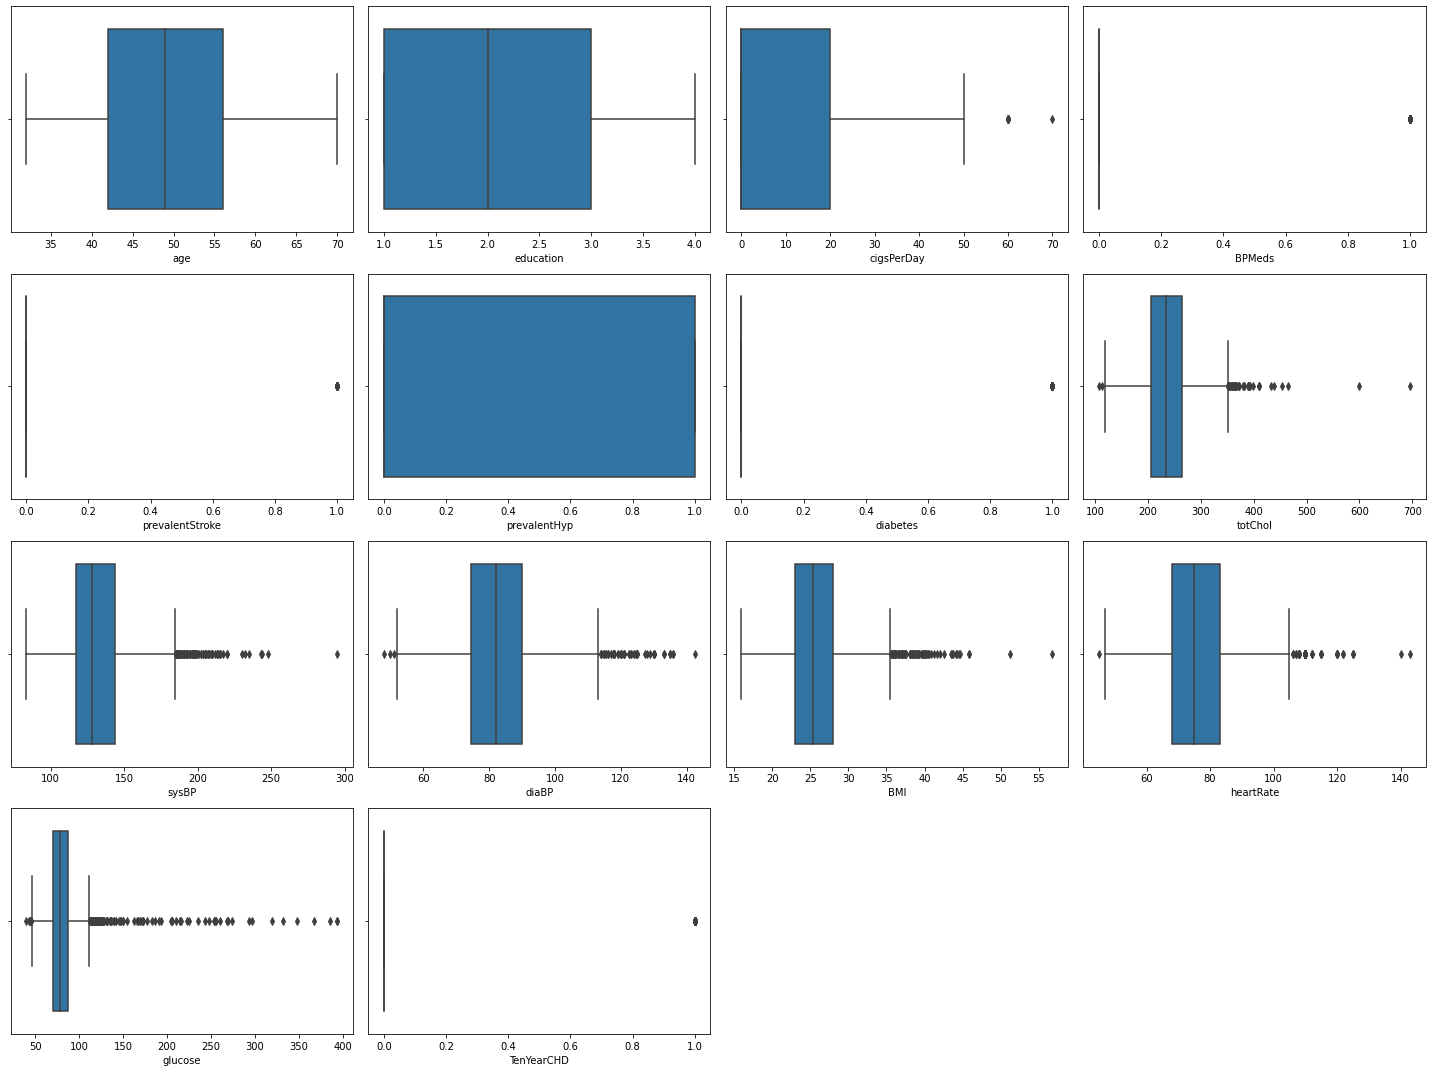

In [10]:
columns =data1.describe()
n = 1
plt.figure(figsize=(20,15))
for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(data[column])
  plt.tight_layout()

- There are outliers but within the possible range of values.

Let's check the correlation between each feature.

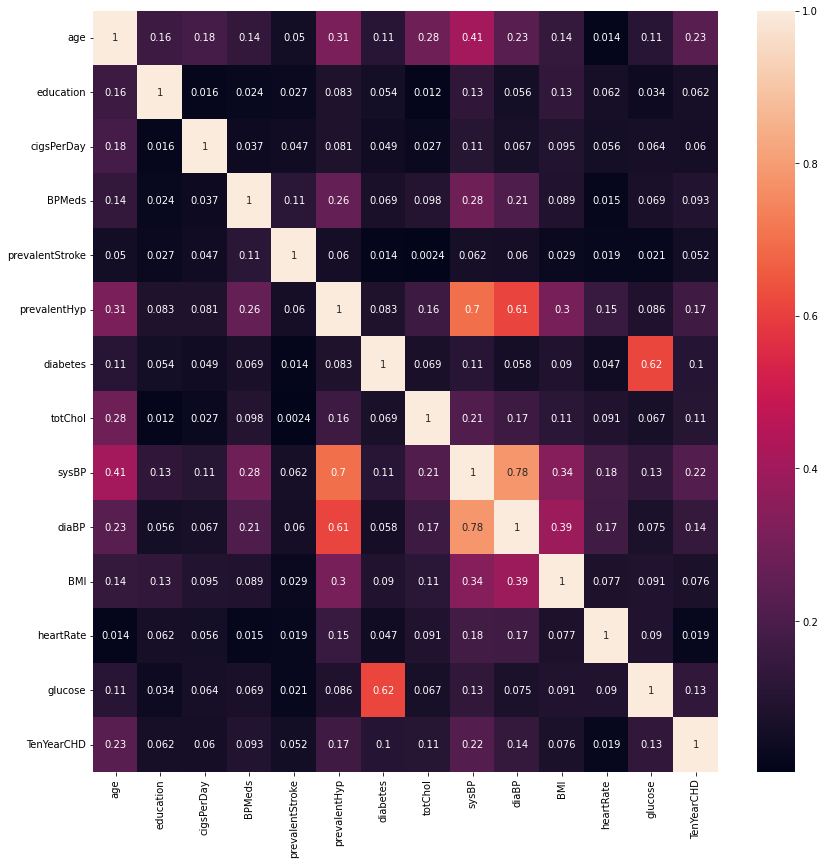

In [11]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = data1.corr()
sns.heatmap(abs(correlation), annot=True)

- from above viz we can see that there  no significant correlation between independent and dependant variables but there is a high correlation within independent variables.

# Eda and Data Preprocessing

### **A) Gender**


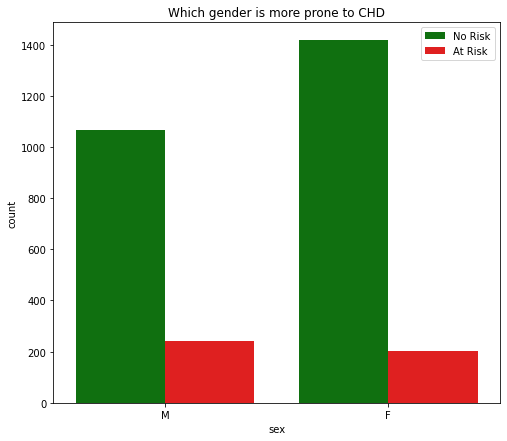

In [12]:
# gender wise analysis
my_palette = {0 : 'green' , 1 : 'red'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (8,7))
sns.countplot(x = data1['sex'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

- from above viz
 **Male are more prone to coronary heart disease**.

### **b) Diabetes**

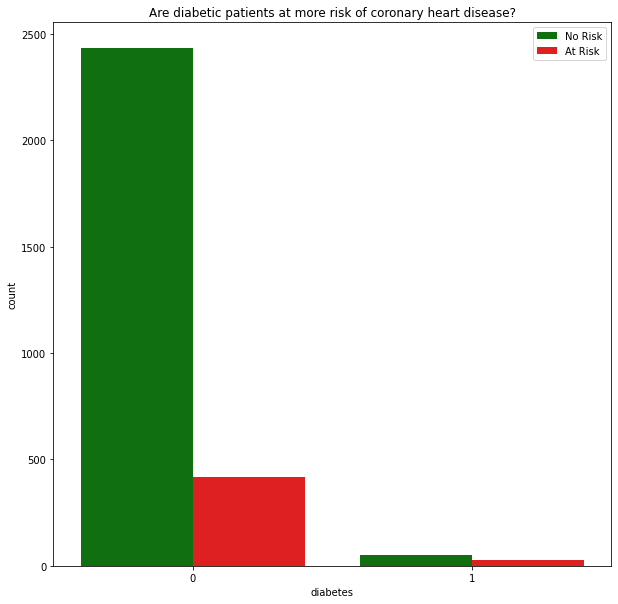

In [13]:
# diabetic patients analysis

my_palette = {0 : 'green' , 1 : 'red'}
plt.figure(figsize = (10,10))
sns.countplot(x = data1['diabetes'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

- from above viz
 **diabetics patients are more prone to coronary heart disease than non diabetics**.

### c) **Is Smoking**

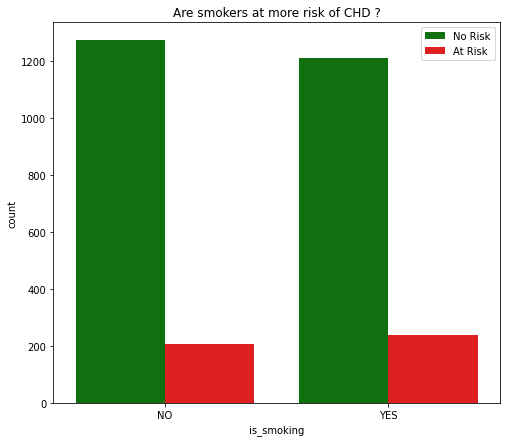

In [14]:
# are smoker at risk 
my_palette = {0 : 'green' , 1 : 'red'}
plt.figure(figsize = (8,7))
sns.countplot(x = data1['is_smoking'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

- from above viz
 **smokers  are more prone to coronary heart disease than non smokers not that much difference**.

### D) **Hypertensive Patients**

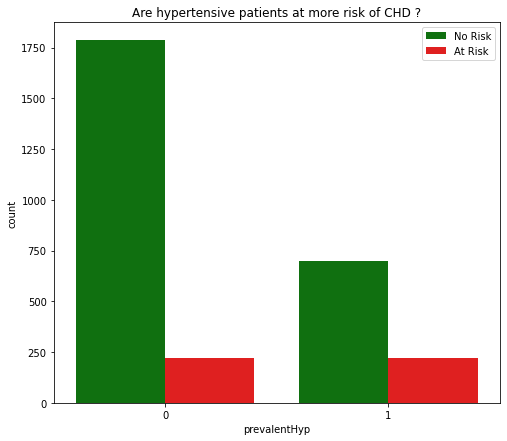

In [15]:
# are hypertensive patients at risk
plt.figure(figsize = (8,7))
my_palette = {0 : 'green' , 1 : 'red'}
sns.countplot(x = data1['prevalentHyp'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

- from above viz
- prevalent hypertensive patients are prone to coronary heart disease.

lesser population than non hypertensive but still we can see around 30% are at risk.

### E) ***BPMeds***

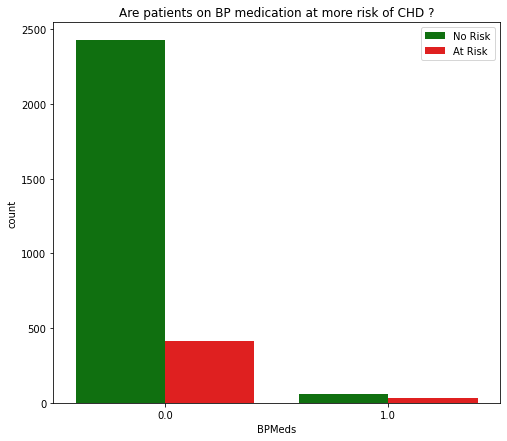

In [16]:
# patients with bp on meds analysis
my_palette = {0 : 'green' , 1 : 'red'}
plt.figure(figsize = (8,7))
sns.countplot(x = data1['BPMeds'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

- from avove viz
- patients with blood pressure on medication are at  more risk of coronary heart disease.

### F) **Age**

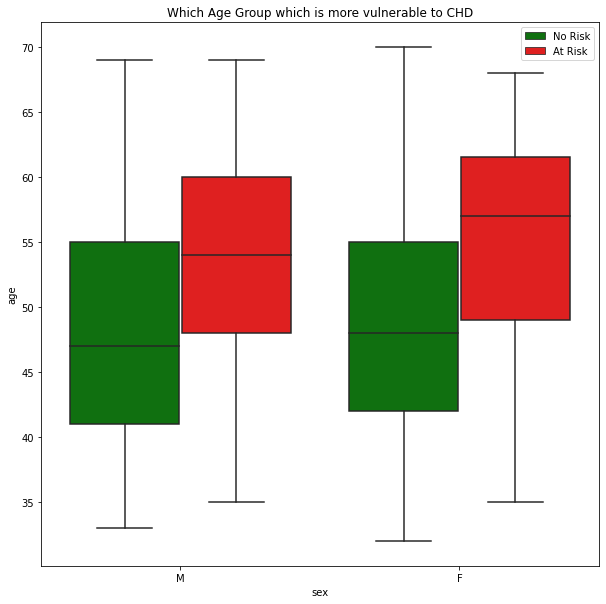

In [17]:
# age group analysis
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = data1['sex'], y = data1['age'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

- from above viz
- we can see that irrespective of gender patients ages, patients above 45 yr old are more prone to coronary heart disease.
- 75% of population at risk is below 65 yrs old.

G) **Total Cholestrol**

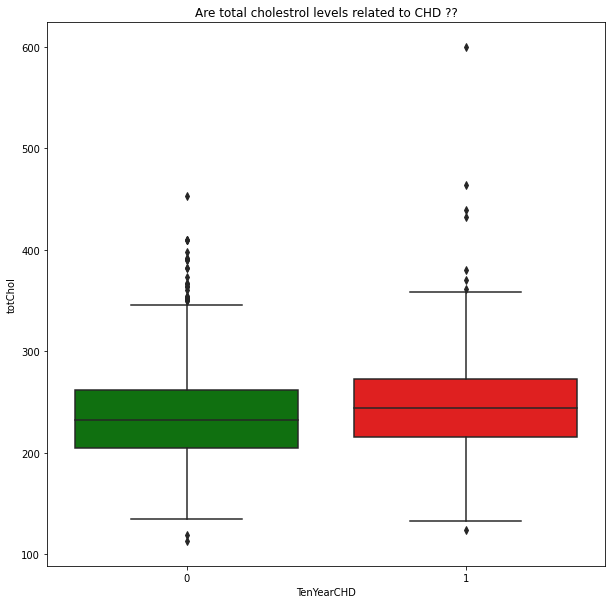

In [18]:
# totchol relation with chd

plt.figure(figsize = (10,10))
sns.boxplot(data1['TenYearCHD'], data1['totChol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()


- This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

H) **Heart Rate**

In [19]:
# creating a new function to split heart rate in low, normal and high range
def heartRate_range(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [20]:
data1['heartRateLabel']=data1.apply(heartRate_range,axis=1)

In [21]:
data1['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of id
1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

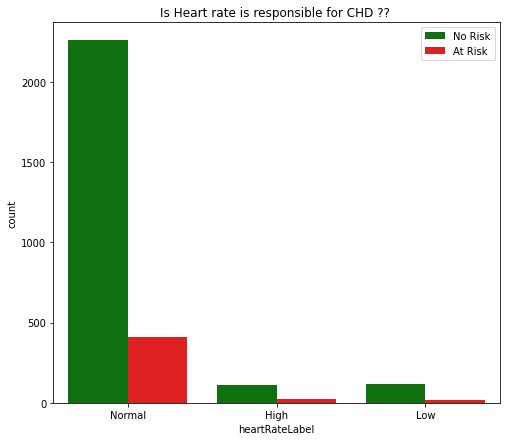

In [22]:
# heart rate relation with chd
plt.figure(figsize = (8,7))
my_palette = {0 : 'green' , 1 : 'red'}
sns.countplot(x = data1['heartRateLabel'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

In [23]:
data1.drop(columns=['heartRateLabel'], inplace=True) # need to drop the column we created 


I) **CigsPerDay**

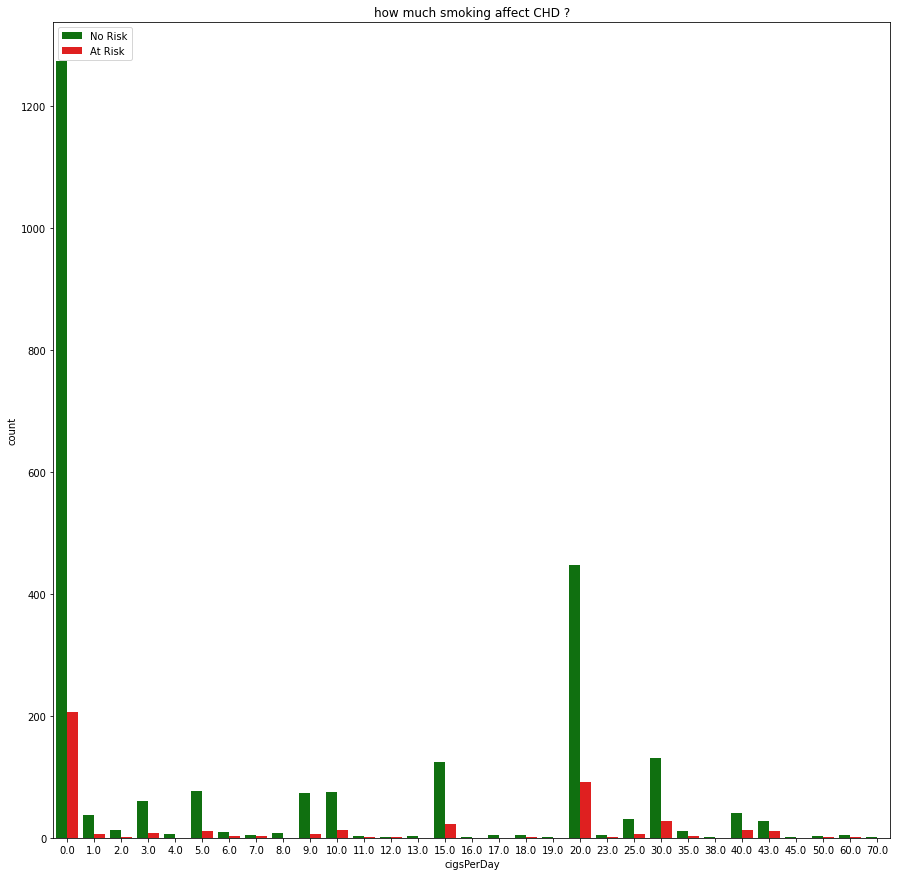

In [24]:
# cigsperday relation with chd
plt.figure(figsize = (15,15))
my_palette = {0 : 'green' , 1 : 'red'}
sns.countplot(x = data1['cigsPerDay'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

- we can see most of the patients are non smoker or having zero cigs per day but still are prone to coronary heart disease.
- But as number of cigs per day increases we can see greater risk of having Chd.

J) **Prevalent Stroke**

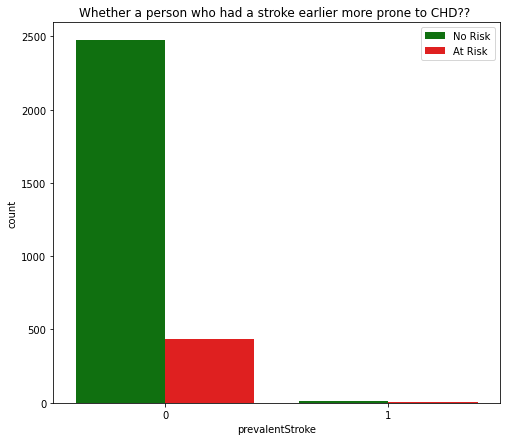

In [25]:
# prevalent stroke relation with CHD
plt.figure(figsize = (8,7))
my_palette = {0 : 'green' , 1 : 'red'}
sns.countplot(x = data1['prevalentStroke'], hue = data1['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

- less patients had stroke earlier 
- but still good amount of prevalent stroke patients are prone to coronary heart disease

K) **SYSBP**

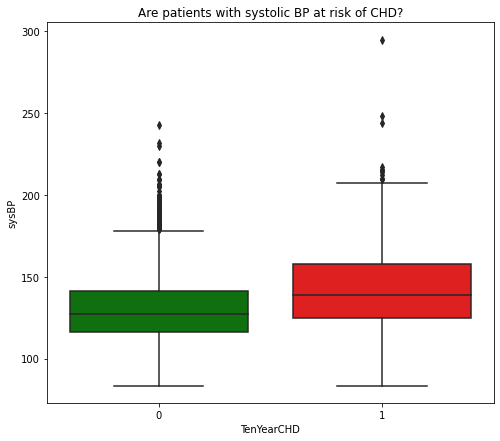

In [26]:
# are systolic bp patients at risk of chd
plt.figure(figsize = (8,7))
sns.boxplot(data1['TenYearCHD'], data1['sysBP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

L) **Diastolic BP**

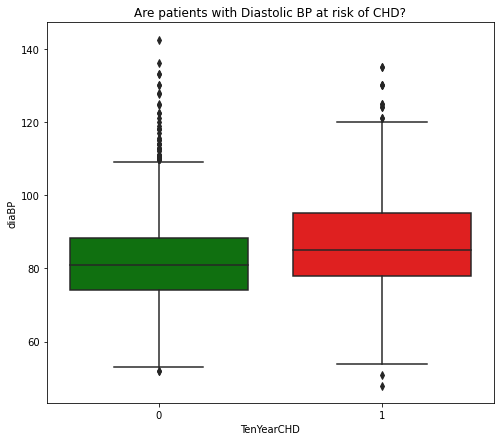

In [27]:
plt.figure(figsize = (8,7))
sns.boxplot(data1['TenYearCHD'], data1['diaBP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

- Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

M) **BMI**

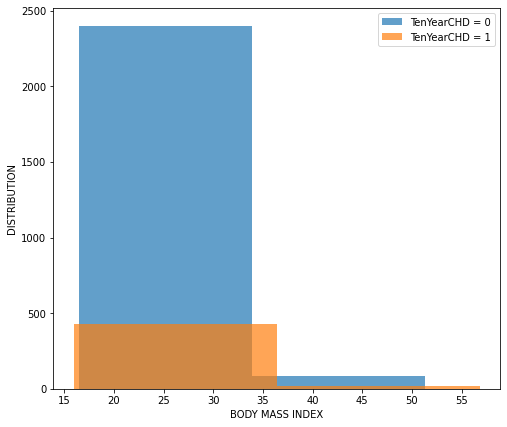

In [28]:
# bmi relation with chd
plt.figure(figsize=(8,7))

plt.hist(data1['BMI'][data1['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(data1['BMI'][data1['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()


# **Model Building**

## Feature engineering

### 1) **Hypertension**
- Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.



In [29]:
# creating a function to classify sysbp and diabp 
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [30]:
# creating new feature hypertension based on sysbp and diabp
data1['Hypertension'] = data1.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

 ### 2) **Diabetes level**
- Blood glucose levels can be used to classify the severity of Diabetes.

In [31]:
## creating a function to classify severity of diabetes using blood glucose values

def diabetes_level(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'    

In [32]:
# creating new feature using blood glucose and diabetes
data1['Diabetes_level'] = data1['glucose'].apply(lambda x: diabetes_level(x))

### 3) **Smoking Factor**
- The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [33]:
data1['SmokingFactor'] = data1['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))


In [34]:
# dropping unnecessary columns 
data1.drop(columns=['cigsPerDay','sysBP','diaBP','glucose','prevalentHyp','is_smoking','diabetes'],inplace=True)

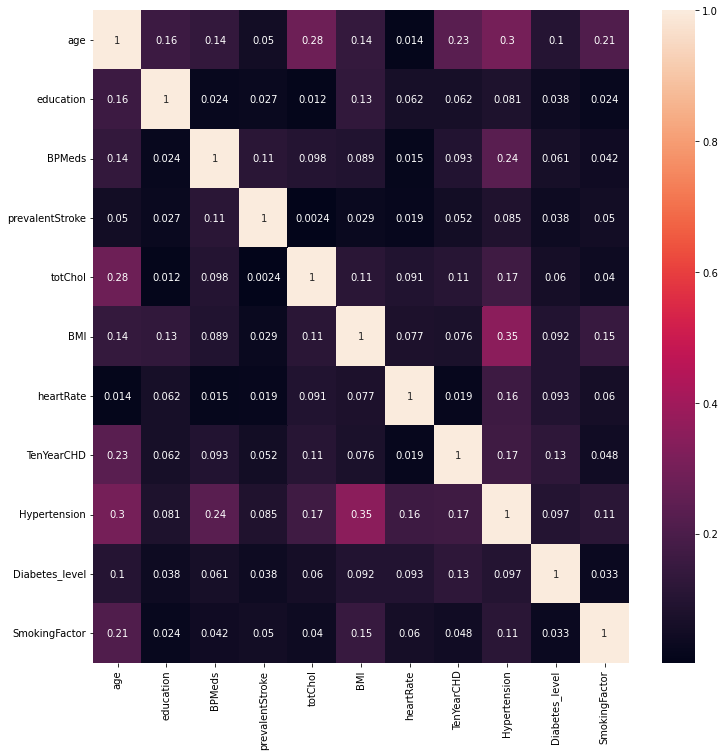

In [35]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = data1.corr()
sns.heatmap(abs(correlation), annot=True)

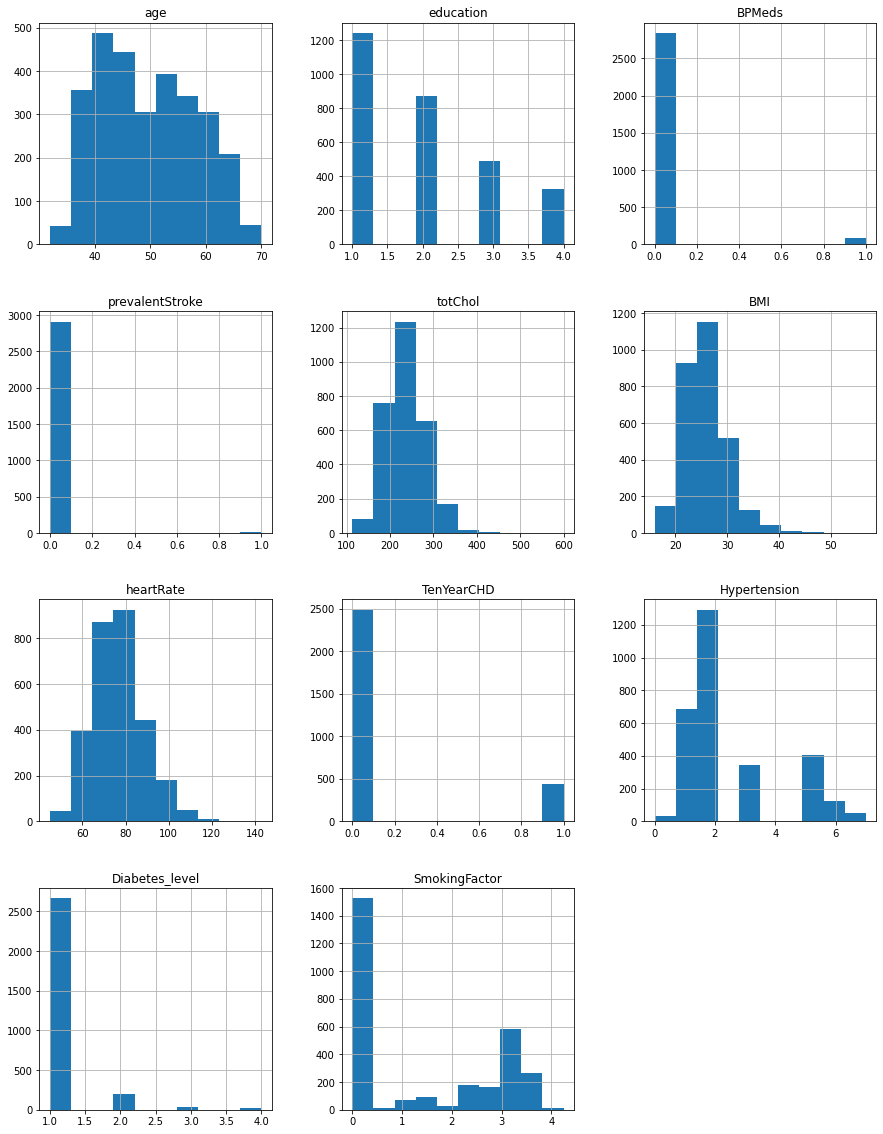

In [36]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data1.hist(ax = ax)
plt.show()

- BPMeds and prevalentStroke does not help in explaining variance so we can remove those columns.

In [37]:
# remove unneccsary column
data1.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2927 non-null   int64  
 1   education       2927 non-null   float64
 2   sex             2927 non-null   object 
 3   totChol         2927 non-null   float64
 4   BMI             2927 non-null   float64
 5   heartRate       2927 non-null   float64
 6   TenYearCHD      2927 non-null   int64  
 7   Hypertension    2927 non-null   int64  
 8   Diabetes_level  2927 non-null   int64  
 9   SmokingFactor   2927 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 331.5+ KB


### Label Encoding
- Converting categorical data to numeric data for model training.

In [39]:
data1['sex'] = data1['sex'].apply(lambda x: 1 if x=='M' else 0)

In [40]:
data1.head()

,age,education,sex,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes_level,SmokingFactor
id,,,,,,,,,,
1,36,4.0,1,212.0,29.77,72.0,0,5,1,0.000000
2,46,1.0,0,250.0,20.35,88.0,0,1,1,2.302585
3,50,1.0,1,233.0,28.26,68.0,1,3,1,2.995732
4,64,1.0,0,241.0,26.42,70.0,0,2,1,3.401197
5,61,3.0,0,272.0,32.80,85.0,1,7,1,0.000000


# Splitting data and Model Training

In [41]:
# splitting dataset into independent and dependent variables
Dependent_variable = 'TenYearCHD'
independent_variable = list(data1.columns)
independent_variable.remove(Dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes_level', 'SmokingFactor']


In [42]:
X = data1[independent_variable].values
y = data1[Dependent_variable].values

## Handling Class Imbalance 
- Let's Resample the dataset to handle this imbalance.
We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [43]:
# values before SMOTE
values_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#values after SMOTE
values_after =dict(Counter(y_smote))
print(values_before, values_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [44]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

### Data Scaling

In [45]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# **KNN**

In [46]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 

In [47]:
#examining metrics
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96838276 0.91494124 0.9034695  0.86765529 0.86401791
 0.83799664 0.83603805 0.81980974 0.81253497]
Test Accuracy:  [0.8590604  0.84116331 0.82662192 0.80872483 0.79306488 0.7885906
 0.77181208 0.76510067 0.75615213 0.75727069]


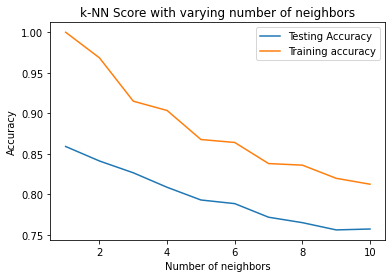

In [48]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- from above viz
  **We can see that test score is increasing as number of neighbours increases.**


### Best parameters 

In [49]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [50]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [52]:
print(knn_cv.best_score_)
print(knn_cv.best_params_)


0.8343605414193649
{'n_neighbors': 1}


In [60]:
# Predictions
knn_predict = knn_cv.predict(X_test)
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       504
           1       0.79      0.93      0.85       390

    accuracy                           0.86       894
   macro avg       0.86      0.87      0.86       894
weighted avg       0.87      0.86      0.86       894



# **Logistic Regression**

In [61]:
# create and train logistic regression model
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [62]:
# Get the model coefficients
lr.coef_

array([[ 0.67902534, -0.0736087 ,  0.18390144,  0.15355995,  0.01843058,
        -0.0860304 ,  0.29829912,  0.23909551,  0.36735927]])

In [63]:
# predictions
train_preds=lr.predict(X_train)
test_preds=lr.predict(X_test)

In [69]:
# accuracy scores
train_accuracy=accuracy_score(train_preds,y_train)
test_accuracy=accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6771124790151091
The accuracy on test data is  0.6767337807606264


[[1465  513]
 [ 641  955]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

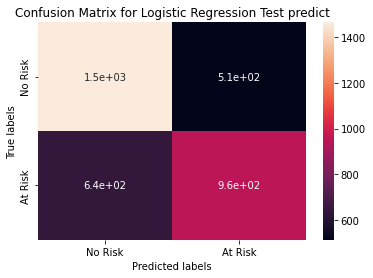

In [70]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[370 134]
 [155 235]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

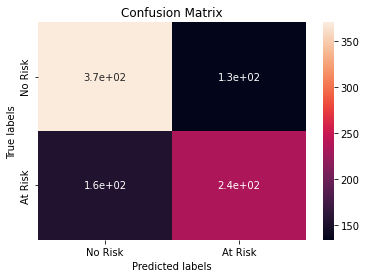

In [71]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [72]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test 
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6683455433455434
Accuracy score: 0.6767337807606264
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1978
           1       0.65      0.60      0.62      1596

    accuracy                           0.68      3574
   macro avg       0.67      0.67      0.67      3574
weighted avg       0.68      0.68      0.68      3574



              precision    recall  f1-score   support

           0       0.70      0.73      0.72       504
           1       0.64      0.60      0.62       390

    accuracy                           0.68       894
   macro avg       0.67      0.67      0.67       894
weighted avg       0.68      0.68      0.68       894



# **Decision Tree** 
- Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [73]:
# now we train and build our model
dt = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

## Predicting on test and train set

In [74]:
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)


In [75]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 78.29977628635348
the training accuracy is 82.70844991606043


[Text(423.828125, 864.8181818181819, 'X[2] <= -1.032\nentropy = 0.992\nsamples = 3574\nvalue = [1978, 1596]'),
 Text(203.4375, 782.4545454545455, 'X[0] <= 0.446\nentropy = 0.842\nsamples = 1537\nvalue = [1121, 416]'),
 Text(106.5625, 700.0909090909091, 'X[8] <= -0.974\nentropy = 0.661\nsamples = 1032\nvalue = [855, 177]'),
 Text(58.125, 617.7272727272727, 'X[3] <= 2.436\nentropy = 0.483\nsamples = 546\nvalue = [489, 57]'),
 Text(38.75, 535.3636363636364, 'X[4] <= 0.258\nentropy = 0.446\nsamples = 539\nvalue = [489, 50]'),
 Text(19.375, 453.0, 'entropy = 0.299\nsamples = 359\nvalue = [340, 19]'),
 Text(58.125, 453.0, 'X[7] <= 4.238\nentropy = 0.663\nsamples = 180\nvalue = [149, 31]'),
 Text(38.75, 370.6363636363636, 'X[0] <= -0.2\nentropy = 0.618\nsamples = 176\nvalue = [149, 27]'),
 Text(19.375, 288.27272727272725, 'entropy = 0.269\nsamples = 87\nvalue = [83, 4]'),
 Text(58.125, 288.27272727272725, 'entropy = 0.824\nsamples = 89\nvalue = [66, 23]'),
 Text(77.5, 370.6363636363636, 'entr

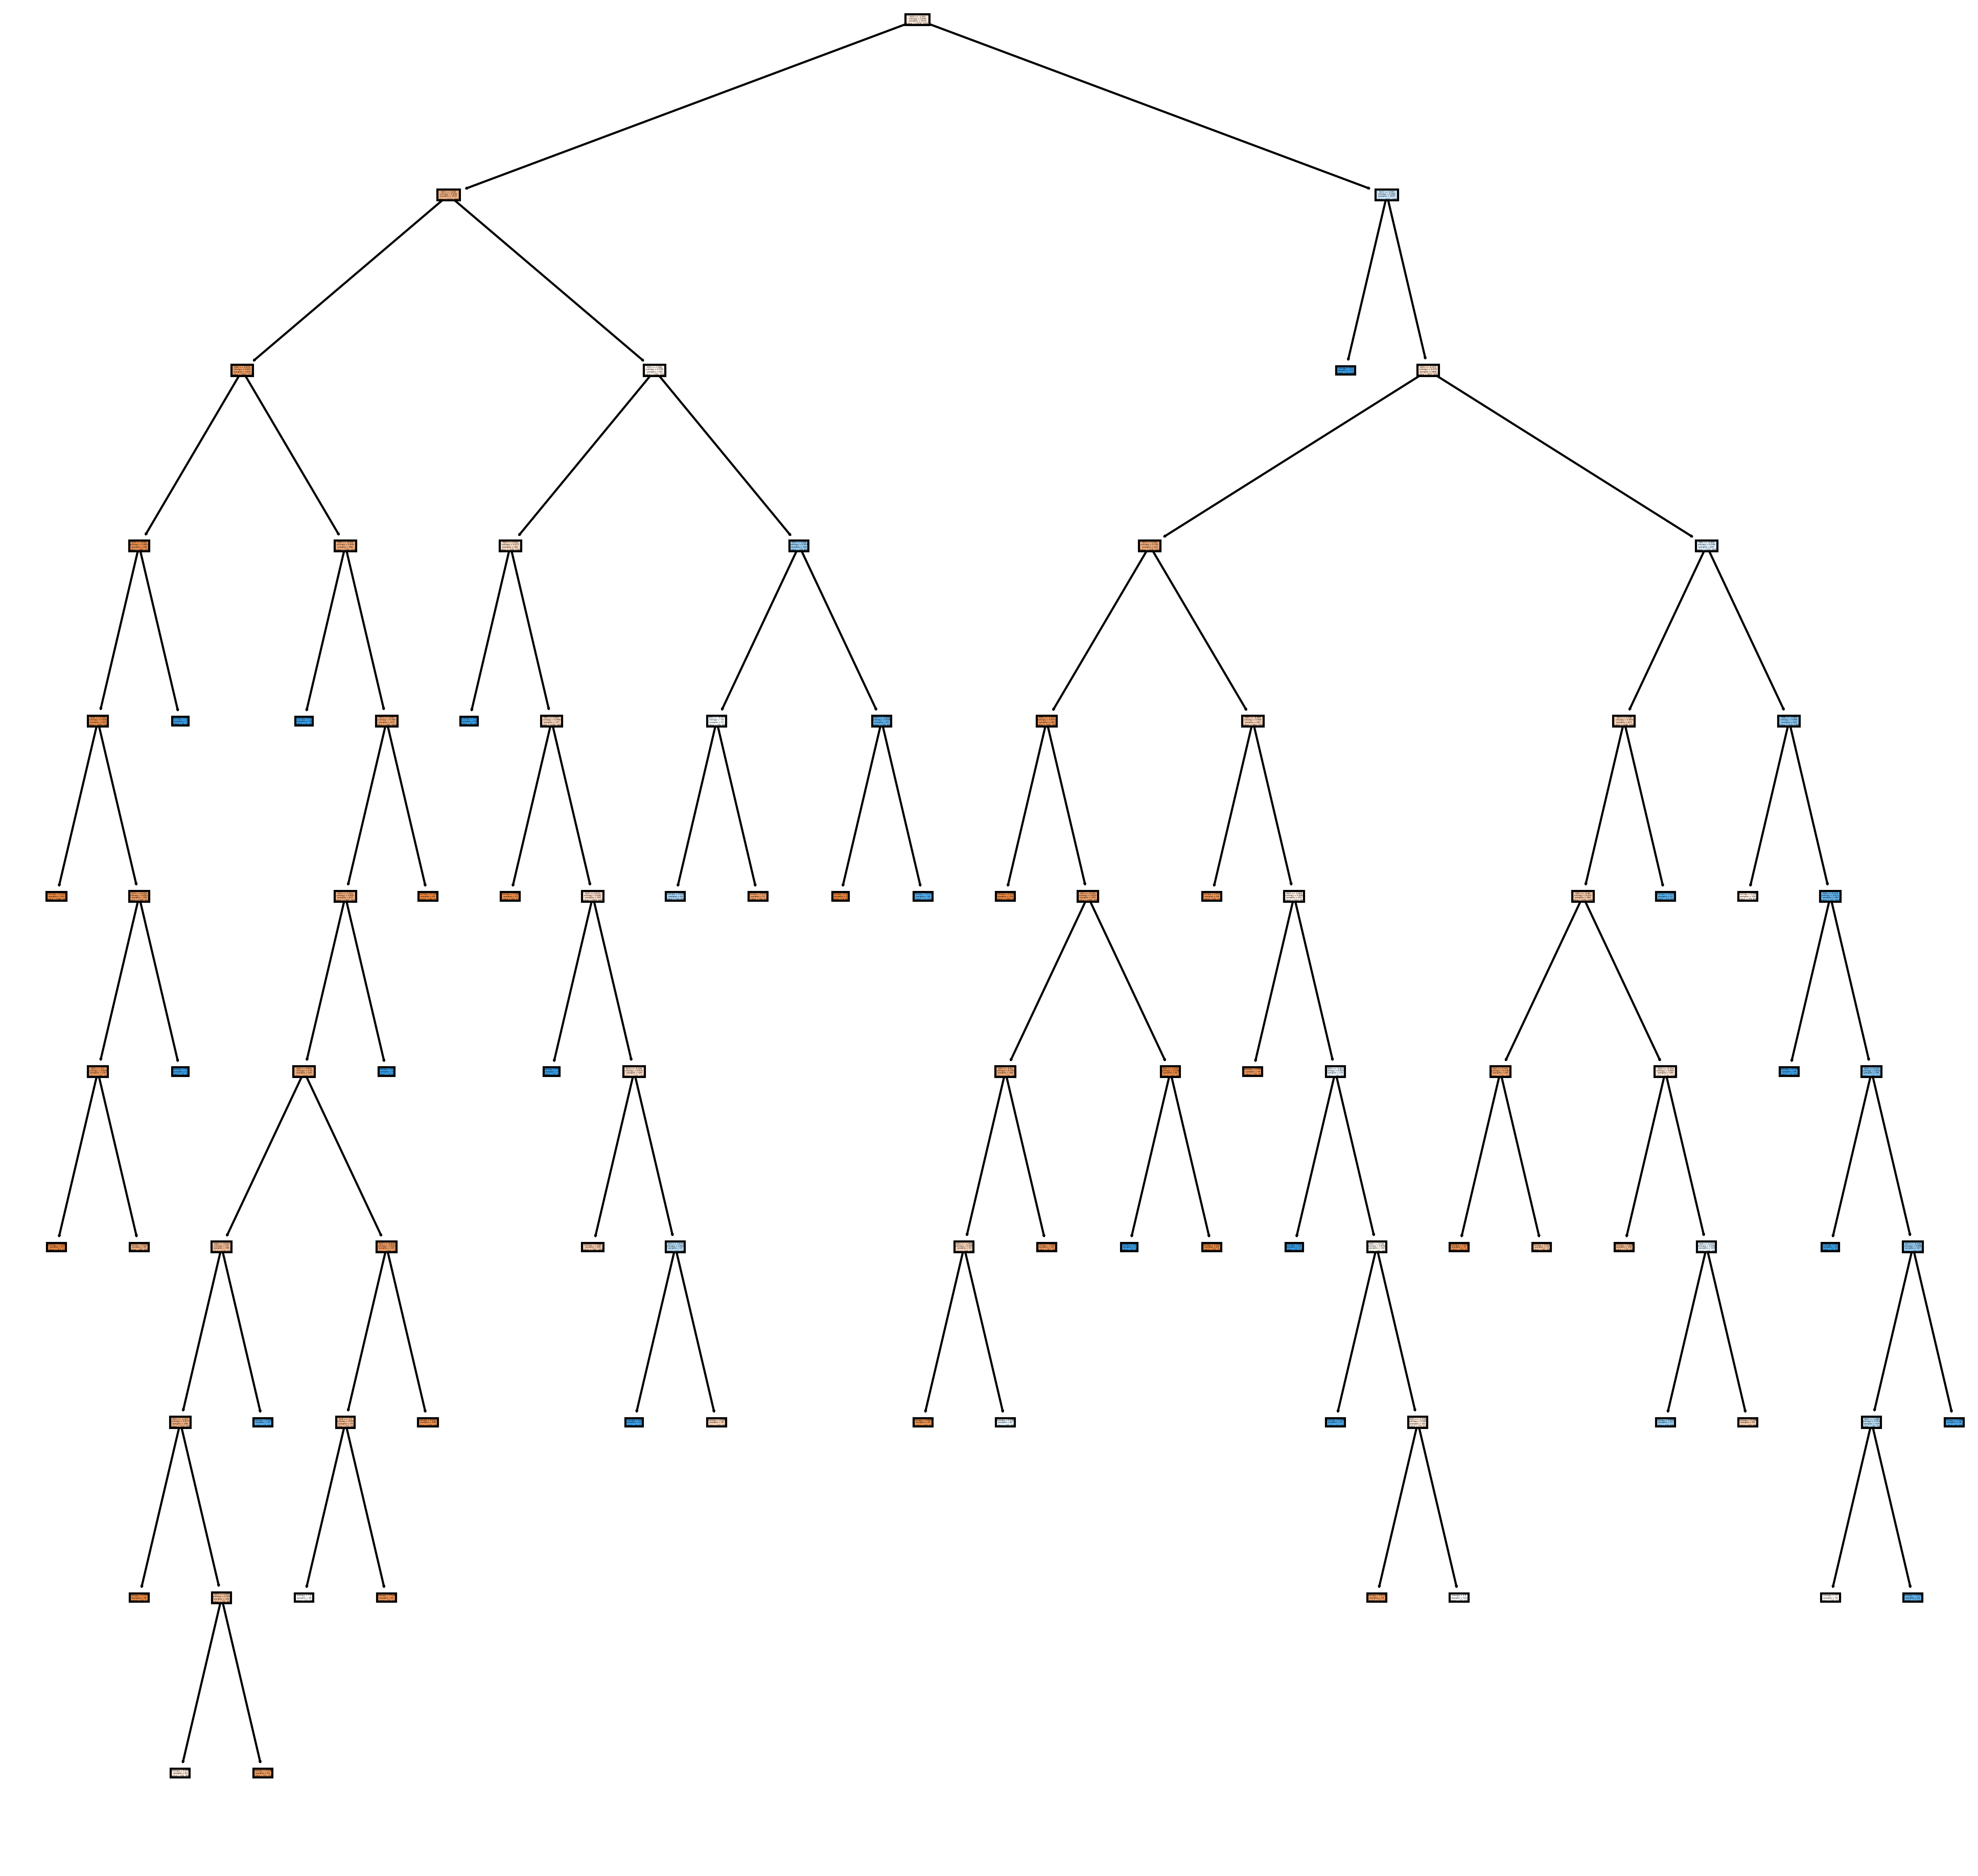

In [76]:
# tree plot
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,filled=True)

[[1840  138]
 [ 480 1116]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

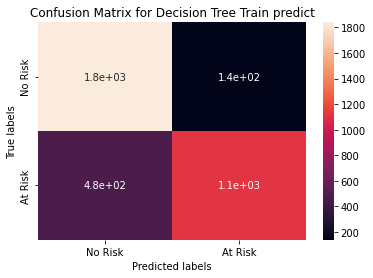

In [77]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[443  61]
 [133 257]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

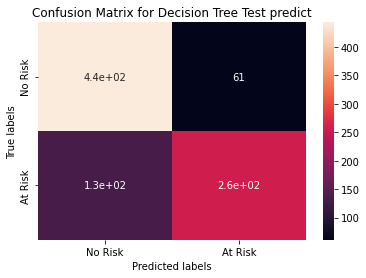

In [78]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [81]:
#classification report for train and test set
print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1978
           1       0.89      0.70      0.78      1596

    accuracy                           0.83      3574
   macro avg       0.84      0.81      0.82      3574
weighted avg       0.84      0.83      0.82      3574

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       504
           1       0.81      0.66      0.73       390

    accuracy                           0.78       894
   macro avg       0.79      0.77      0.77       894
weighted avg       0.79      0.78      0.78       894

